# 『1과목 : 』AI기반 데이터 분석

## 『1-3』 데이터 전처리

### 데이터 확인 및 검증

In [ ]:
import numpy as np

data = [10, 12, 11, 999, 13, 14]  # 999는 잡음

# 간단한 잡음 제거: 3σ 이상 제거
mean = np.mean(data)
std = np.std(data)

clean_data = [x for x in data if abs(x - mean) <= 3 * std]
print(clean_data)  # [10, 12, 11, 13, 14]

[10, 12, 11, 999, 13, 14]


### 앤스컴의 예

In [ ]:
import numpy as np
import pandas as pd

anscombe_data = np.load('datasets/anscombe.npy')
print(anscombe_data.shape)

print("=" * 80)

anscombe_data[0]

stats_df = pd.DataFrame(index=['X_mean', 'X_variance', 'Y_mean',
                               'Y_variance', 'X&Y_correlation',
                               'X&Y_regression line'])
for i, data in enumerate(anscombe_data):
    dataX = data[:, 0]
    dataY = data[:, 1]
    poly_fit = np.polyfit(dataX, dataY, 1)
    stats_df[f'data{i+1}'] =\
        [f'{np.mean(dataX):.2f}',
         f'{np.var(dataX):.2f}',
         f'{np.mean(dataY):.2f}',
         f'{np.var(dataY):.2f}',
         f'{np.corrcoef(dataX, dataY)[0, 1]:.2f}',
         f'{poly_fit[1]:.2f}+{poly_fit[0]:.2f}x']

print(stats_df)

(4, 11, 2)
                          data1       data2       data3       data4
X_mean                     9.00        9.00        9.00        9.00
X_variance                10.00       10.00       10.00       10.00
Y_mean                     7.50        7.50        7.50        7.50
Y_variance                 3.75        3.75        3.75        3.75
X&Y_correlation            0.82        0.82        0.82        0.82
X&Y_regression line  3.00+0.50x  3.00+0.50x  3.00+0.50x  3.00+0.50x


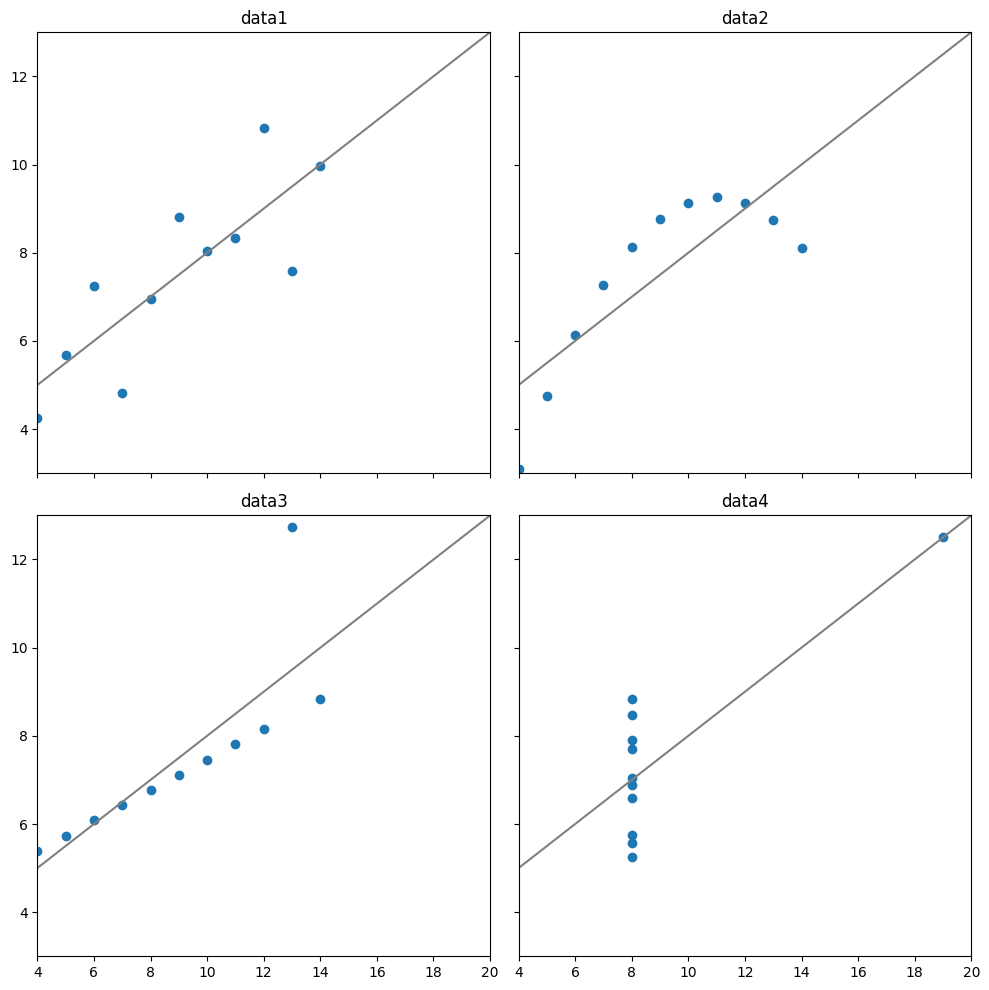

In [ ]:
import matplotlib.pyplot as plt

# 그래프를 그리기 위한 영역을 2x2개 생성
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 10),
                         sharex=True, sharey=True)

xs = np.linspace(0, 30, 100)
for i, data in enumerate(anscombe_data):
    poly_fit = np.polyfit(data[:,0], data[:,1], 1)
    poly_1d = np.poly1d(poly_fit)
    ys = poly_1d(xs)
    # 그리는 영역을 선택
    ax = axes[i//2, i%2]
    ax.set_xlim([4, 20])
    ax.set_ylim([3, 13])
    # 타이틀을 부여
    ax.set_title(f'data{i+1}')
    ax.scatter(data[:,0], data[:,1])
    ax.plot(xs, ys, color='gray')

# 그래프 사이의 간격을 좁힘
plt.tight_layout()
plt.show()

### 시각화 기초 연습

In [ ]:
%matplotlib inline

In [ ]:
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['font.family'] = 'Malgun Gothic' # Windows
# matplotlib.rcParams['font.family'] = 'AppleGothic' # Mac
matplotlib.rcParams['font.size'] = 15 # 글자 크기
matplotlib.rcParams['axes.unicode_minus'] = False # 한글 폰트 사용 시, 마이너스 글자가 깨지는 현상을 해결

In [ ]:
import seaborn as sns
from matplotlib import pyplot as plt

In [ ]:
import pandas
df = pandas.read_csv('datasets/iris_full.csv')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
df = sns.load_dataset('iris')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


Text(0, 0.5, '꽃받침 길이')

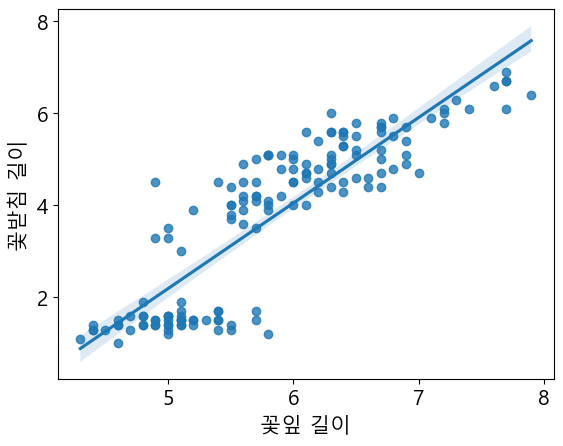

In [ ]:
ax = sns.regplot(x=df["sepal_length"], y=df["petal_length"])
ax.set_xlabel('꽃잎 길이')
ax.set_ylabel('꽃받침 길이')

<Axes: xlabel='sepal_length', ylabel='petal_length'>

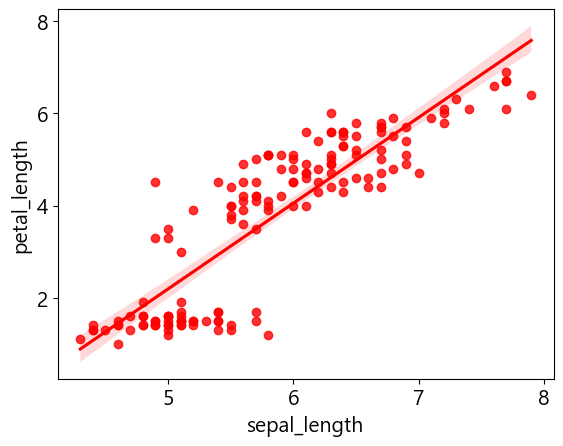

In [ ]:
sns.regplot(x=df["sepal_length"], y=df["petal_length"], color='red')

<Axes: xlabel='sepal_length', ylabel='petal_length'>

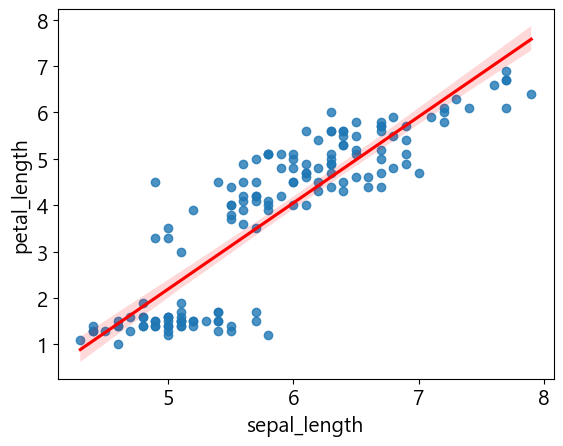

In [ ]:
sns.regplot(x=df["sepal_length"], y=df["petal_length"], line_kws={'color': 'red'})

<Axes: xlabel='sepal_length', ylabel='petal_length'>

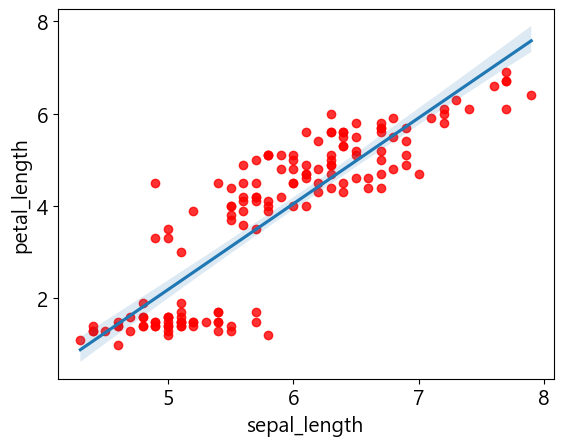

In [ ]:
sns.regplot(x=df["sepal_length"], y=df["petal_length"], scatter_kws={'color': 'red'})

<Axes: xlabel='sepal_length', ylabel='petal_length'>

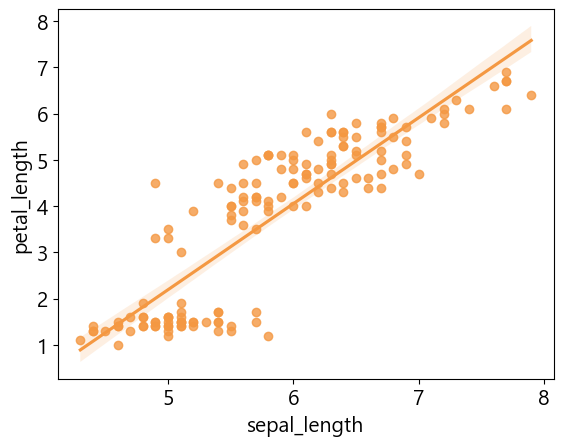

In [ ]:
sns.regplot(x=df["sepal_length"], y=df["petal_length"], color='#f49842')

<Axes: xlabel='sepal_length', ylabel='petal_length'>

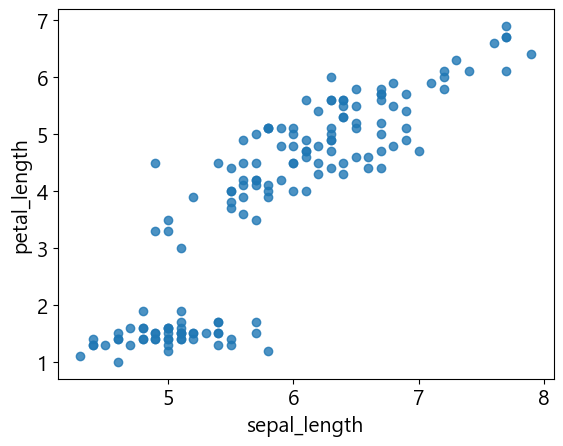

In [ ]:
sns.regplot(x=df["sepal_length"], y=df["petal_length"], fit_reg=False)

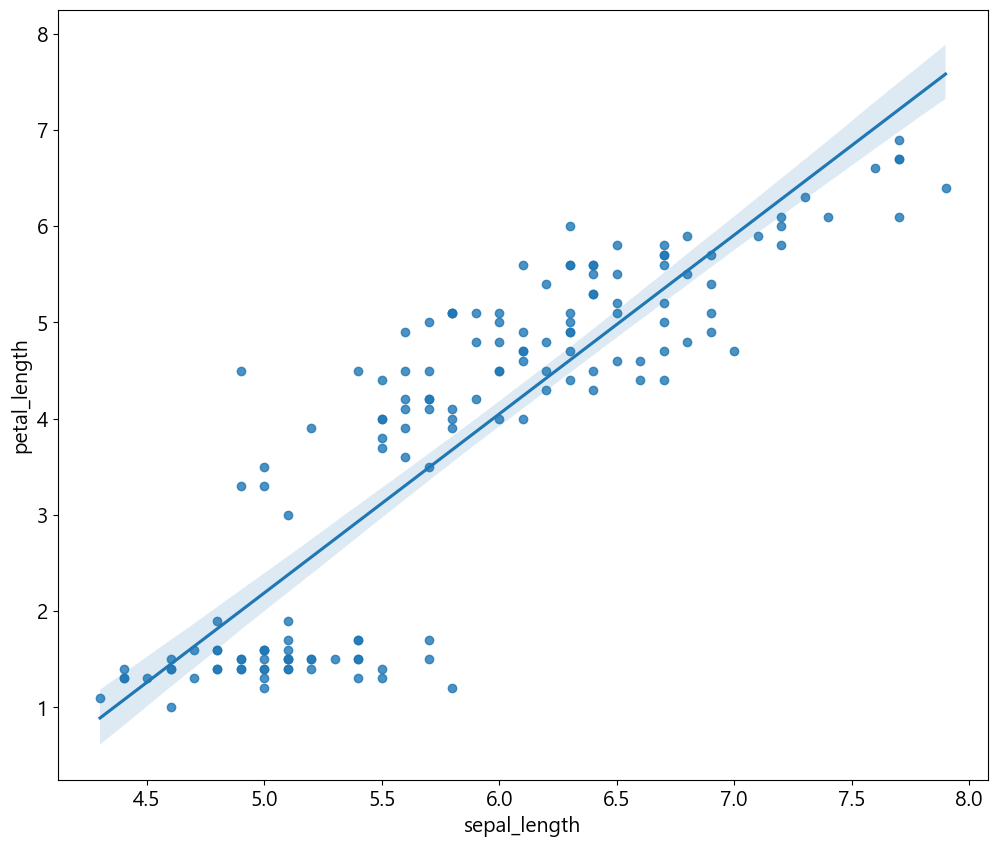

In [ ]:
ax = sns.regplot(x=df["sepal_length"], y=df["petal_length"])
ax.figure.set_size_inches(12, 10)

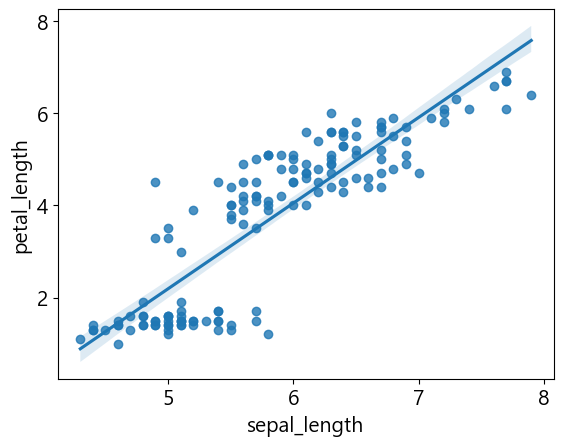

In [ ]:
ax = sns.regplot(x=df["sepal_length"], y=df["petal_length"])
ax.figure.savefig('lm.png')

### 히스토그램

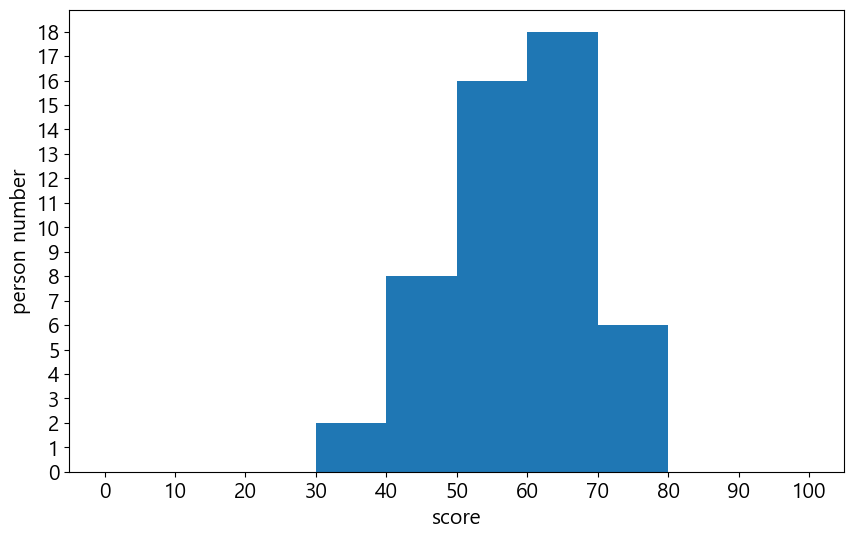

In [ ]:
# Matplotlib의 pyplot 모듈을 plt라는 이름으로 임포트
import matplotlib.pyplot as plt

# 그래프가 notebook 위에 표시
%matplotlib inline

df = pd.read_csv('datasets/scores.csv', index_col='student number')
english_scores = np.array(df['english'])


# 캔버스를 생성
# figsize로 가로・세로 크기를 지정
fig = plt.figure(figsize=(10, 6))
# 켄버스 위에 그래프를 그리기 위한 영역을 지정
# 인수는 영역을 1×1개 지정、하나의 영역에 그린다는 것을 의미
ax = fig.add_subplot(111)

# 계급수를 10으로 하여 히스토그램을 그림
freq, _, _ = ax.hist(english_scores , bins=10, range=(0, 100))
# X축에 레이블 부여
ax.set_xlabel('score')
# Y축에 레이블 부여
ax.set_ylabel('person number')
# X축을 0, 10, 20, ..., 100 눈금으로 구분
ax.set_xticks(np.linspace(0, 100, 10+1))
# Y축을 0, 1, 2, ...의 눈금으로 구분
ax.set_yticks(np.arange(0, freq.max()+1))
# 그래프 표시
plt.show()

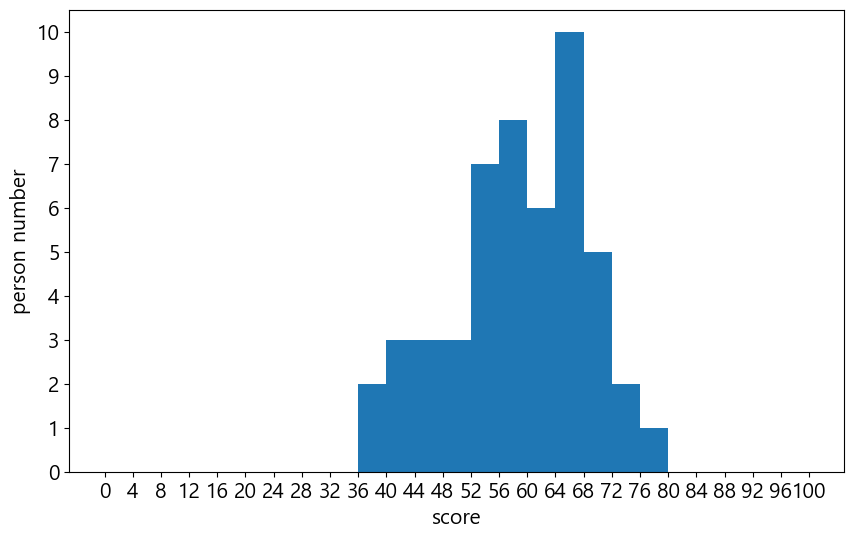

In [ ]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

freq, _ , _ = ax.hist(english_scores , bins=25, range=(0, 100))
ax.set_xlabel('score')
ax.set_ylabel('person number')
ax.set_xticks(np.linspace(0, 100, 25+1))
ax.set_yticks(np.arange(0, freq.max()+1))
plt.show()

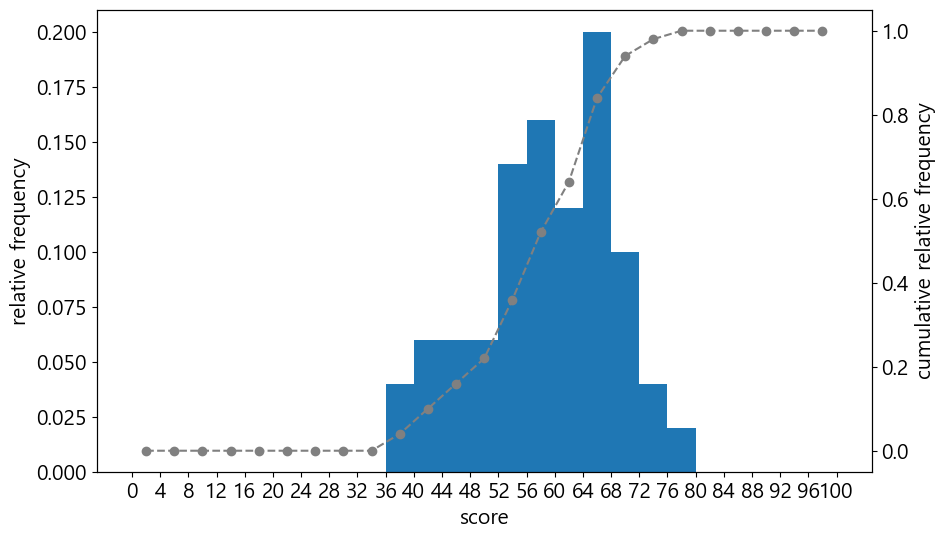

In [ ]:
fig = plt.figure(figsize=(10, 6))
ax1 = fig.add_subplot(111)
# Y축의 스케일이 다른 그래프를 ax1과 동일한 영역에 생성
ax2 = ax1.twinx()

# 상대도수의 히스토그램으로 하기 위해서는, 도수를 데이터의 수로 나눌 필요가 있음
# 이것은 hist의 인수 weight를 지정하면 실현 가능
weights = np.ones_like(english_scores ) / len(english_scores )
rel_freq, _, _ = ax1.hist(english_scores , bins=25,
                          range=(0, 100), weights=weights)

cum_rel_freq = np.cumsum(rel_freq)
class_value = [(i+(i+4))//2 for i in range(0, 100, 4)]
# 꺾은선 그래프를 그림
# 인수 ls를 '--'로 하면 점선이 그려짐
# 인수 marker를 'o'으로 하면 데이터 점을 그람
# 인수 color를 'gray'로 하면 회색으로 지정
ax2.plot(class_value, cum_rel_freq,
         ls='--', marker='o', color='gray')
# 꺾은선 그래프의 눈금선을 제거
ax2.grid(visible=False)

ax1.set_xlabel('score')
ax1.set_ylabel('relative frequency')
ax2.set_ylabel('cumulative relative frequency')
ax1.set_xticks(np.linspace(0, 100, 25+1))

plt.show()

### 상자그림

C:\Users\k8s\AppData\Local\Temp\ipykernel_7604\2786744008.py:3: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax.boxplot(english_scores , labels=['english'])


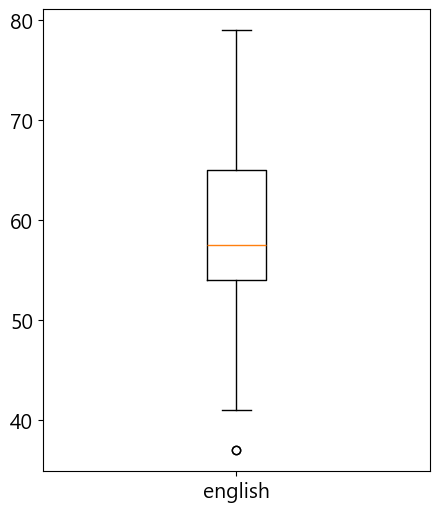

In [ ]:
fig = plt.figure(figsize=(5, 6))
ax = fig.add_subplot(111)
ax.boxplot(english_scores , labels=['english'])

plt.show()

### 네이버 쇼핑 리뷰 워드클라우드

In [ ]:
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['font.family'] = 'Malgun Gothic' # Windows
# matplotlib.rcParams['font.family'] = 'AppleGothic' # Mac
matplotlib.rcParams['font.size'] = 15 # 글자 크기
matplotlib.rcParams['axes.unicode_minus'] = False # 한글 폰트 사용 시, 마이너스 글자가 깨지는 현상을 해결

# Windows의 경우 맑은 고딕 폰트 경로 지정
fontpath = 'C:/Windows/Fonts/malgun.ttf'  # 맑은 고딕 폰트 경로

In [ ]:
import pandas as pd # 판다스
import numpy as np # 넘파이
import matplotlib.pyplot as plt # 맷플롯립
from konlpy.tag import Okt # 형태소 분석기 Okt
from collections import Counter
from wordcloud import WordCloud

df = pd.read_table('datasets/naver_shopping.txt', names=['ratings', 'reviews'])
df

,ratings,reviews
0,5,배공빠르고 굿
1,2,택배가 엉망이네용 저희집 밑에층에 말도없이 놔두고가고
2,5,아주좋아요 바지 정말 좋아서2개 더 구매했어요 이가격에 대박입니다. 바느질이 조금 ...
3,2,선물용으로 빨리 받아서 전달했어야 하는 상품이었는데 머그컵만 와서 당황했습니다. 전...
4,5,민트색상 예뻐요. 옆 손잡이는 거는 용도로도 사용되네요 ㅎㅎ
...,...,...
199995,2,장마라그런가!!! 달지않아요
199996,5,다이슨 케이스 구매했어요 다이슨 슈퍼소닉 드라이기 케이스 구매했어요가격 괜찮고 배송...
199997,5,로드샾에서 사는것보다 세배 저렴하네요 ㅜㅜ 자주이용할께요
199998,5,넘이쁘고 쎄련되보이네요~


In [ ]:
print(df['reviews'].nunique())

199908


In [ ]:
# 중복 샘플 제거
df.drop_duplicates(subset=['reviews'], inplace=True)
df

,ratings,reviews
0,5,배공빠르고 굿
1,2,택배가 엉망이네용 저희집 밑에층에 말도없이 놔두고가고
2,5,아주좋아요 바지 정말 좋아서2개 더 구매했어요 이가격에 대박입니다. 바느질이 조금 ...
3,2,선물용으로 빨리 받아서 전달했어야 하는 상품이었는데 머그컵만 와서 당황했습니다. 전...
4,5,민트색상 예뻐요. 옆 손잡이는 거는 용도로도 사용되네요 ㅎㅎ
...,...,...
199995,2,장마라그런가!!! 달지않아요
199996,5,다이슨 케이스 구매했어요 다이슨 슈퍼소닉 드라이기 케이스 구매했어요가격 괜찮고 배송...
199997,5,로드샾에서 사는것보다 세배 저렴하네요 ㅜㅜ 자주이용할께요
199998,5,넘이쁘고 쎄련되보이네요~


In [ ]:
tokenizer = Okt()
df['tokenized'] = df['reviews'].apply(tokenizer.nouns)

df.head()

,ratings,reviews,tokenized
0,5,배공빠르고 굿,"[배공, 굿]"
1,2,택배가 엉망이네용 저희집 밑에층에 말도없이 놔두고가고,"[택배, 엉망, 용, 집, 밑, 층, 말]"
2,5,아주좋아요 바지 정말 좋아서2개 더 구매했어요 이가격에 대박입니다. 바느질이 조금 ...,"[아주, 바지, 정말, 개, 더, 구매, 가격, 대박, 바느질, 조금, 가성, 비,..."
3,2,선물용으로 빨리 받아서 전달했어야 하는 상품이었는데 머그컵만 와서 당황했습니다. 전...,"[선물, 용, 전달, 상품, 머그컵, 당황, 바로, 배송, 누락, 확인, 안, 바로..."
4,5,민트색상 예뻐요. 옆 손잡이는 거는 용도로도 사용되네요 ㅎㅎ,"[민트, 색상, 옆, 손잡이, 거, 용, 도로, 사용]"


In [ ]:
df['label'] = np.select([df.ratings > 3], [1], default=0)
df.head()

,ratings,reviews,tokenized,label
0,5,배공빠르고 굿,"[배공, 굿]",1
1,2,택배가 엉망이네용 저희집 밑에층에 말도없이 놔두고가고,"[택배, 엉망, 용, 집, 밑, 층, 말]",0
2,5,아주좋아요 바지 정말 좋아서2개 더 구매했어요 이가격에 대박입니다. 바느질이 조금 ...,"[아주, 바지, 정말, 개, 더, 구매, 가격, 대박, 바느질, 조금, 가성, 비,...",1
3,2,선물용으로 빨리 받아서 전달했어야 하는 상품이었는데 머그컵만 와서 당황했습니다. 전...,"[선물, 용, 전달, 상품, 머그컵, 당황, 바로, 배송, 누락, 확인, 안, 바로...",0
4,5,민트색상 예뻐요. 옆 손잡이는 거는 용도로도 사용되네요 ㅎㅎ,"[민트, 색상, 옆, 손잡이, 거, 용, 도로, 사용]",1


In [ ]:
positive_reviews = np.hstack(df[df['label']==1]['tokenized'].values)
negative_reviews = np.hstack(df[df['label']==0]['tokenized'].values)

In [ ]:
positive_reviews_word_count = Counter(positive_reviews)
print(positive_reviews_word_count.most_common(20))

[(np.str_('배송'), 16282), (np.str_('구매'), 9530), (np.str_('사용'), 7209), (np.str_('가격'), 6687), (np.str_('제품'), 5307), (np.str_('주문'), 5087), (np.str_('생각'), 4689), (np.str_('더'), 4438), (np.str_('맛'), 4277), (np.str_('것'), 3955), (np.str_('때'), 3845), (np.str_('아주'), 3843), (np.str_('좀'), 3648), (np.str_('사이즈'), 3600), (np.str_('포장'), 3536), (np.str_('또'), 3341), (np.str_('맘'), 3081), (np.str_('정말'), 3019), (np.str_('아이'), 2859), (np.str_('거'), 2785)]


In [ ]:
negative_reviews_word_count = Counter(negative_reviews)
print(negative_reviews_word_count.most_common(20))

[(np.str_('배송'), 12199), (np.str_('그냥'), 10562), (np.str_('별로'), 7464), (np.str_('제품'), 6735), (np.str_('생각'), 6589), (np.str_('좀'), 6557), (np.str_('사용'), 6461), (np.str_('구매'), 6092), (np.str_('맛'), 5300), (np.str_('개'), 5122), (np.str_('가격'), 4903), (np.str_('주문'), 4807), (np.str_('부분'), 4461), (np.str_('반품'), 4125), (np.str_('때'), 4077), (np.str_('더'), 4072), (np.str_('냄새'), 4061), (np.str_('사이즈'), 4049), (np.str_('상품'), 3981), (np.str_('안'), 3768)]


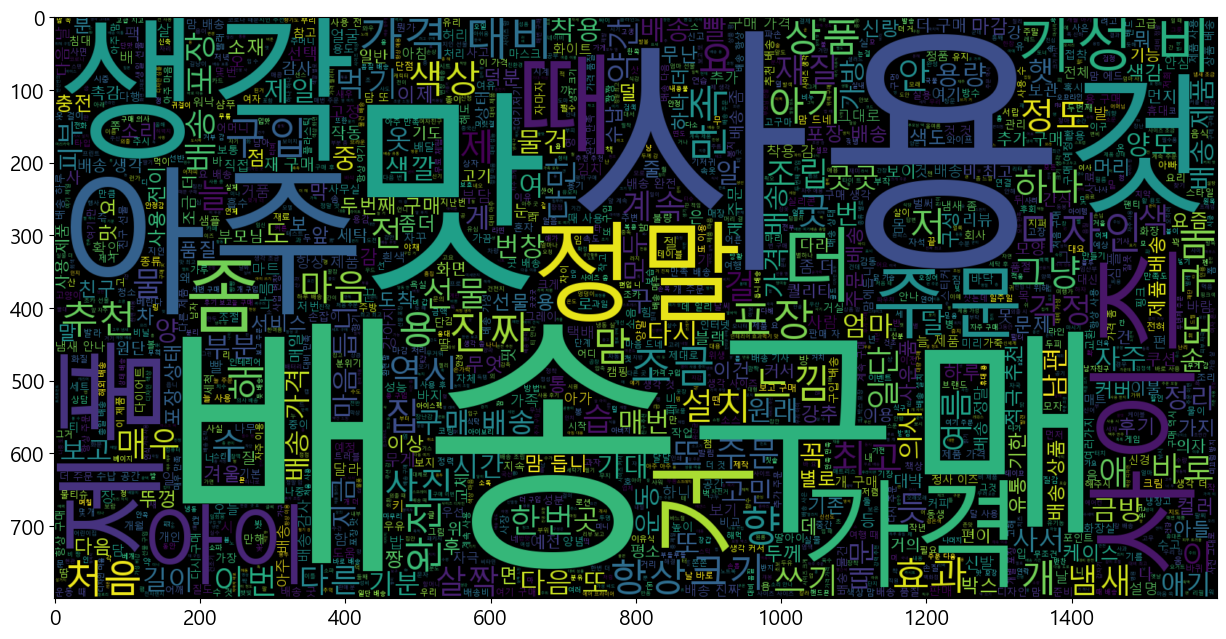

In [ ]:
# 긍정 리뷰의 워드 클라우드
plt.figure(figsize = (15,15))
temp_data = ' '.join(np.concatenate(df[df['label']==1].tokenized.reset_index(drop=True)))
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800, font_path = fontpath).generate(temp_data)
plt.imshow(wc, interpolation = 'bilinear')

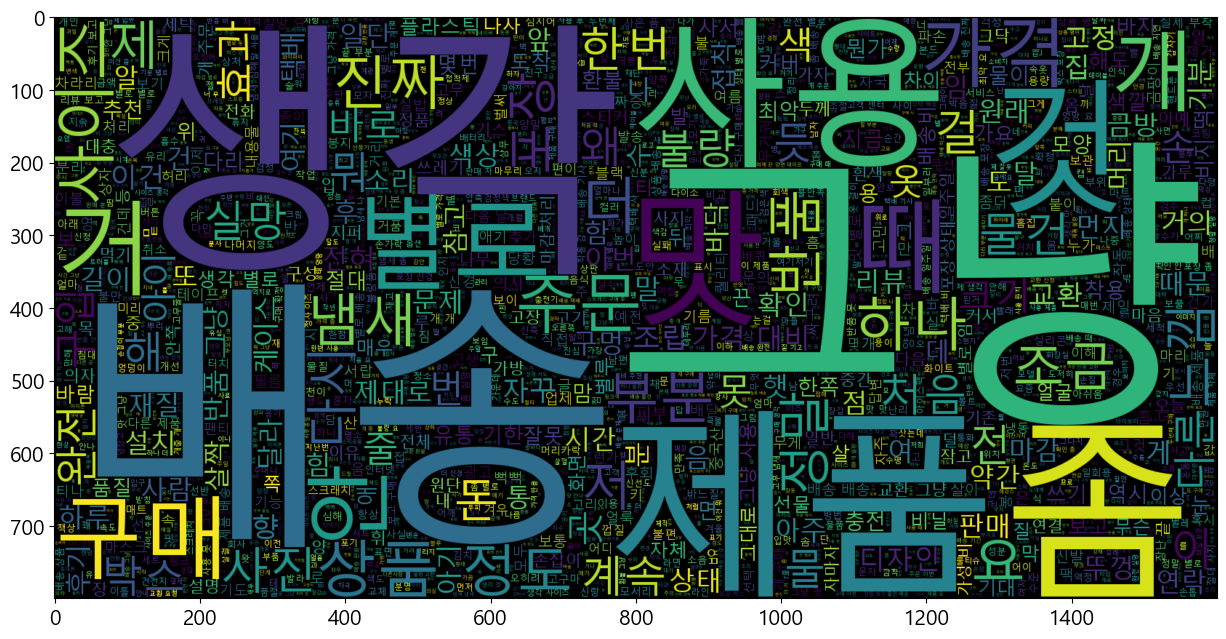

In [ ]:
# 부정 리뷰의 워드 클라우드
plt.figure(figsize = (15,15))
temp_data = ' '.join(np.concatenate(df[df['label']==0].tokenized.reset_index(drop=True)))
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800, font_path = fontpath).generate(temp_data)
plt.imshow(wc, interpolation = 'bilinear')